# Importação e Exportação de dados
<p><img src = https://www.misterpostman.com.br/wp-content/uploads/2016/07/Importacao-de-Dados.jpg width=500></p>

## Introdução
Para extrair insights do seu banco de dados, você precisa de dados. E, embora seja possível que alguns desses dados sejam preenchidos e atualizados para você, sempre haverá cenários em que você precisa de mais dados que ainda não estão em seu banco de dados. Neste módulo, vamos explorar como podemos fazer *upload* de dados com eficiência para nosso banco de dados centralizado para análise posterior.

Não apenas queremos fazer *upload* de dados para nosso banco de dados para análise posterior, mas também haverá momentos em que queremos fazer *download* de dados de nosso banco de dados para processamento adicional. Também exploraremos o processo de extração de dados de nosso banco de dados.

Um dos principais motivos pelos quais você deseja fazer *upload* ou *download* de dados de ou para seu banco de dados é porque você tem outras ferramentas de análise que deseja usar. Muitas vezes, você desejará usar outro *software* para analisar seus dados. Neste módulo, também veremos como você pode integrar seus fluxos de trabalho com duas linguagens de programação específicas que são frequentemente usadas para análise: **Python** e **R**. Essas linguagens são poderosas porque são fáceis de usar, permitem funcionalidades avançadas e são de código aberto, e têm grandes comunidades que os apoiam como resultado de sua popularidade. Veremos como grandes conjuntos de dados podem ser passados entre nossas linguagens de programação e nossos bancos de dados de forma eficiente para que possamos ter fluxos de trabalho que aproveitem todas as ferramentas disponíveis para nós.

Com isso em mente, começaremos analisando a funcionalidade de *upload* e *download* em massa no cliente de linha de comando do *Postgres*, *psql*, e então passaremos para a importação e exportação de dados usando **Python** e **R**.
## O comando COPY
A esta altura, você provavelmente está bastante familiarizado com a instrução **SELECT**,  que nos permite recuperar dados de nosso banco de dados. Embora esse comando seja útil para pequenos conjuntos de dados que podem ser verificados rapidamente, geralmente desejamos salvar um grande conjunto de dados em um arquivo. Ao salvar esses conjuntos de dados em arquivos, podemos processar ou analisar os dados localmente usando *Excel*, *Python* ou *R*. Para recuperar esses grandes conjuntos de dados, podemos usar o comando Postgres **COPY**, que transfere dados de um banco de dados para um arquivo com eficiência, ou de um arquivo para um banco de dados.

In [2]:
import psycopg2 as pg

# Tabela a ser criada e os parametros
table= """
         SELECT *
         FROM customers
         LIMIT 5
        """


# Realizando a conexão local no Banco de dados (SQLDA)
connection = pg.connect(user="postgres",
                        password="admin",
                        host="127.0.0.1",
                        port="5432",
                        database="sqlda")
# Posicionando o cursor
cur = connection.cursor()

# Saída da Query
outputquery = "COPY ({0}) TO STDOUT WITH CSV HEADER".format(table)

# Salvando o arquivo.csv
with open('resultsfile.csv', 'w') as f:
	cur.copy_expert(outputquery, f)

# Encerrando a conexão
cur.close()

Essa instrução retorna cinco linhas da tabela, com cada registro em uma nova linha e cada valor separado por uma vírgula, em um formato de arquivo .csv típico. O cabeçalho também está incluído na parte superior.

Aqui está o detalhamento deste comando e os parâmetros que foram passados:
* **COPY** é simplesmente o comando usado para transferir dados para um formato de arquivo.
* **(SELECT * FROM clients LIMIT 5)** é a consulta que queremos copiar.
* **TO STDOUT** indica que os resultados devem ser impressos em vez de salvos em um arquivo no disco rígido. "Standard Out" é o termo comum para exibir a saída em um ambiente de terminal de linha de comando.
* **WITH** é uma palavra-chave opcional usada para separar os parâmetros que usaremos na transferência de banco de dados para arquivo.
* **CSV** indica que usaremos o formato de arquivo **CSV**. Poderíamos também ter especificado **BINARY** ou deixar isso de fora e receber a saída em formato de texto.
* **HEADER** indica que queremos que o cabeçalho seja impresso também.

Embora a opção **STDOUT** seja útil, muitas vezes queremos salvar os dados em um arquivo. O comando **COPY** oferece funcionalidade para fazer isso, mas os dados são salvos localmente no **servidor Postgres**. Você deve especificar o caminho completo do arquivo (caminhos de arquivo relativos não são permitidos). Se você tiver seu banco de dados **Postgres** rodando em seu computador, você pode testar isso usando o seguinte comando:

In [3]:
import psycopg2 as pg

# Tabela a ser criada e os parametros
table= """
         SELECT *
         FROM customers
         LIMIT 5
        """


# Realizando a conexão local no Banco de dados (SQLDA)
connection = pg.connect(user="postgres",
                        password="admin",
                        host="127.0.0.1",
                        port="5432",
                        database="sqlda")
# Posicionando o cursor
cur = connection.cursor()

# Saída da Query
outputquery = "COPY ({0}) TO STDOUT WITH CSV HEADER".format(table)

# Salvando o arquivo.csv
with open(r'C:\Users\willi\Downloads\resultsfile.csv', 'w') as f:
    cur.copy_expert(outputquery, f)

# Encerrando a conexão
cur.close()

### Configurando COPY e \copy
Existem várias opções para configurar os comandos COPY e \copy:
* **FORMAT format_name** pode ser usado para especificar o formato. As opções para **format_name** são **csv**, **text** ou **binary**. Alternativamente, você pode simplesmente especificar **CSV** ou **BINARY** sem a palavra-chave **FORMAT**, ou não especificar o formato e deixar a saída padrão para um formato de arquivo de texto.
* **DELIMITER 'delimiter_character'** pode ser usado para especificar o caractere delimitador para arquivos **CSV** ou de texto (por exemplo, ',' para arquivos CSV ou '|' para arquivos separados por barra vertical)
* **NULL 'null_string'** pode ser usado para especificar como os valores nulos devem ser representados (por exemplo, ' ' se os espaços em branco representarem valores nulos ou **'NULL'** se for assim que os valores ausentes devem ser representados nos dados).
* **HEADER** especifica que o cabeçalho deve ser gerado.
* **QUOTE 'quote_character'** pode ser usado para especificar como campos com caracteres especiais (por exemplo, uma vírgula em um valor de texto em um arquivo CSV) podem ser colocados entre aspas para que sejam ignorados por **COPY**.
* **ESCAPE 'escape_character'** especifica o caractere que pode ser usado para escapar do caractere a seguir.
* **ENCODING 'encoding_name'** permite a especificação da codificação, o que é particularmente útil quando você está lidando com idiomas estrangeiros que contêm caracteres especiais ou entrada do usuário.

### Usando COPY e \copy para carregar dados em massa para seu banco de dados
Como vimos, os comandos de cópia podem ser usados para baixar dados com eficiência, mas também podem ser usados para fazer upload de dados.

Os comandos **COPY** e **\copy** são muito mais eficientes no *upload* de dados do que uma instrução **INSERT**. Existem algumas razões para isso:
* Ao usar **COPY**, há apenas um *commit*, que ocorre após todas as linhas serem inseridas.
* Há menos comunicação entre o banco de dados e o cliente, portanto, há menos latência de rede.
* O Postgres inclui otimizações para **COPY** que não estariam disponíveis por meio de **INSERT**.

Aqui está um exemplo de uso do comando **\copy** para copiar linhas de um arquivo para a tabela:

`\copy customers FROM 'my_file.csv' CSV HEADER DELIMITER ',';`

Aqui está o detalhamento deste comando e os parâmetros que foram passados:
* **\copy** está invocando o comando **Postgres COPY ... FROM STDOUT...** para carregar os dados no banco de dados.
* **customers** especifica o nome da tabela à qual desejamos anexar.
* **FROM 'my_file.csv'** especifica que estamos fazendo *upload* de registros de **my_file.csv** – a palavra-chave **FROM** especifica que estamos fazendo *upload* de registros em oposição à palavra-chave **TO** que usamos para fazer *download* de registros.
* Os parâmetros **WITH CSV HEADER** funcionam da mesma forma que antes.
* **DELIMITER ','** especifica qual é o delimitador no arquivo. Para um arquivo CSV, supõe-se que seja uma vírgula, portanto, não precisamos desse parâmetro. No entanto, para facilitar a leitura, pode ser útil definir explicitamente esse parâmetro, apenas para lembrar como o arquivo foi formatado.

> #### Observação
> Embora **COPY** e **\copy** sejam ótimos para exportar dados para outras ferramentas, há uma funcionalidade adicional no Postgres para exportar um backup de banco de dados. Para essas tarefas de manutenção, você pode usar **pg_dump** para uma tabela específica e **pg_dumpall** para um banco de dados ou esquema inteiro. Esses comandos ainda permitem que você salve dados em formato compactado (**tar**), o que economiza espaço. Infelizmente, o formato de saída desses comandos é normalmente SQL e não pode ser consumido prontamente fora do Postgres. Portanto, não nos ajuda a importar ou exportar dados de e para outras ferramentas de análise, como **Python** e **R**.

### Exercício 19: Exportando dados para um arquivo para processamento adicional no Excel
Neste exercício, estaremos salvando um arquivo contendo as cidades com o maior número de clientes ZoomZoom. Essa análise ajudará o comitê executivo do ZoomZoom a decidir onde eles podem querer abrir a próxima concessionária.

In [4]:
# Tabela a ser criada e os parametros
table= """
         SELECT city,
         count(1) AS number_of_customers
         FROM customers
         WHERE city IS NOT NULL
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 10
        """

# Realizando a conexão local no Banco de dados (SQLDA)
connection = pg.connect(user="postgres",
                        password="admin",
                        host="127.0.0.1",
                        port="5432",
                        database="sqlda")
# Posicionando o cursor
cur = connection.cursor()

# Saída da Query
outputquery = "COPY ({0}) TO STDOUT WITH CSV HEADER DELIMITER ','".format(table)

# Salvando o arquivo.csv
with open('top_cities.csv', 'w') as f:
    cur.copy_expert(outputquery, f)

# Encerrando a conexão
cur.close()

## Usando Python com nosso banco de dados
Embora outras linguagens tenham uma variedade de funcionalidades, muitos cientistas de dados e analistas de dados estão começando a usar o **Python**. Por quê? Porque o Python oferece uma linguagem de alto nível semelhante que pode ser facilmente usada para processar dados. Embora o número de pacotes estatísticos e funcionalidades em outras linguagens ainda possam ter uma vantagem sobre o **Python**, o **Python** está crescendo rapidamente e geralmente ultrapassou o *R* na maioria das pesquisas recentes. Muitas das funcionalidades do **Python** também são mais rápidas que o *R*, em parte porque grande parte é escrita em *C*, uma linguagem de programação de nível inferior.

A outra grande vantagem do *Python* é que ele é muito versátil. Embora o *R* seja geralmente usado apenas nas comunidades de pesquisa e análise estatística, o *Python* pode ser usado para fazer qualquer coisa, desde análise estatística até a criação de um servidor web. Como resultado, a comunidade de desenvolvedores é muito maior para *Python*. Uma comunidade de desenvolvimento maior é uma grande vantagem porque há melhor suporte da comunidade (por exemplo, no *StackOverflow*) e há mais pacotes e módulos *Python* sendo desenvolvidos todos os dias. O último grande benefício do *Python* é que, por ser uma linguagem de programação geral, pode ser mais fácil implantar o código *Python* em um ambiente de produção e certos controles (como namespaces do *Python*) tornam o *Python* menos suscetível a erros.

Como resultado dessas vantagens, pode ser preferível aprender *Python*, a menos que a funcionalidade necessária esteja disponível apenas em *R* ou se o restante de sua equipe estiver usando *R*.
### Por que usar *Python*?
Enquanto o SQL pode realizar estatísticas descritivas de nível agregado, o *Python* (como o *R*) nos permite realizar outras análises estatísticas e visualizações de dados. Além dessas vantagens, o *Python* pode ser usado para criar pipelines repetíveis que podem ser implantados na produção e também pode ser usado para criar servidores Web de análise interativa. Enquanto *R* é uma linguagem de programação especializada, *Python* é uma linguagem de programação generalista – um pau para toda obra. Quaisquer que sejam seus requisitos de análise, você quase sempre pode concluir sua tarefa usando as ferramentas disponíveis em *Python*.

### Começando com Python
Embora existam muitas maneiras de obter o Python, vamos começar com a distribuição Anaconda do Python, que vem com muitos dos pacotes de análise comumente usados pré-instalados.

In [5]:
import psycopg2
with psycopg2.connect(host="127.0.0.1", user="postgres", password="admin", dbname="sqlda", port=5432) as conn:
	with conn.cursor() as cur:
		cur.execute("SELECT * FROM customers LIMIT 5")
		records = cur.fetchall()
records

[(1,
  None,
  'Arlena',
  'Riveles',
  None,
  'ariveles0@stumbleupon.com',
  'F',
  '98.36.172.246',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  datetime.datetime(2017, 4, 23, 0, 0)),
 (2,
  'Dr',
  'Ode',
  'Stovin',
  None,
  'ostovin1@npr.org',
  'M',
  '16.97.59.186',
  '314-534-4361',
  '2573 Fordem Parkway',
  'Saint Louis',
  'MO',
  '63116',
  38.5814,
  -90.2625,
  datetime.datetime(2014, 10, 2, 0, 0)),
 (3,
  None,
  'Braden',
  'Jordan',
  None,
  'bjordan2@geocities.com',
  'M',
  '192.86.248.59',
  None,
  '5651 Kennedy Park',
  'Pensacola',
  'FL',
  '32590',
  30.6143,
  -87.2758,
  datetime.datetime(2018, 10, 27, 0, 0)),
 (4,
  None,
  'Jessika',
  'Nussen',
  None,
  'jnussen3@salon.com',
  'F',
  '159.165.138.166',
  '615-824-2506',
  '224 Village Circle',
  'Nashville',
  'TN',
  '37215',
  36.0986,
  -86.8219,
  datetime.datetime(2017, 9, 3, 0, 0)),
 (5,
  None,
  'Lonnie',
  'Rembaud',
  None,
  'lrembaud4@discovery.com',
  'F',
  '18.131.58.65',
  

Esses comandos podem ser divididos da seguinte forma:
Primeiro, importamos o pacote **psycopg2** usando o seguinte comando: **import psycopg2**. Em seguida, configuramos nosso objeto de conexão usando **psycopg2.connect(host="my_host", user="my_username", password="my_password", dbname="zoomzoom", port=5432)**.

Todos os parâmetros do banco de dados são inseridos aqui, portanto, você deve substituir os parâmetros conforme necessário para sua configuração. Se você configurou um arquivo **.pgpass**, pode deixar de fora o parâmetro de senha. Isso é empacotado **with .. as conn** em *Python*; a instrução **with** derruba automaticamente o objeto (neste caso, a conexão) quando o recuo retorna. Isso é particularmente útil para conexão de banco de dados, onde uma conexão ociosa pode consumir recursos de banco de dados inadvertidamente. Podemos armazenar esse objeto de conexão em uma variável conn usando a instrução **as conn**.

Agora que temos uma conexão, precisamos criar um objeto **cursor**, que nos permitirá ler a partir do banco de dados. **conn.cursor()** cria o objeto de **cursor** de banco de dados, que nos permite executar SQL na conexão de banco de dados, e a instrução **with** nos permite derrubar automaticamente o cursor quando não precisamos mais dele.

**cur.execute("SELECT * FROM clientes LIMIT 5")** envia a consulta **"SELECT * FROM clientes LIMIT 5"** para o banco de dados e a executa.

**records = cur.fetchall()** busca todas as linhas restantes em um resultado de consulta e atribui essas linhas à variável **records**.

Agora que enviamos a consulta ao banco de dados e recebemos os registros, podemos redefinir o nível de recuo. Podemos visualizar nosso resultado inserindo a expressão (neste caso, apenas os registros do nome da variável) e pressionando *Enter*. Essa saída são os cinco registros de clientes que coletamos.

Embora pudéssemos nos conectar ao banco de dados e ler os dados, havia várias etapas, e a sintaxe era um pouco mais complexa do que para algumas das outras abordagens que tentamos. Embora o **psycopg2** possa ser poderoso, pode ser útil usar alguns dos outros pacotes em *Python* para facilitar a interface com o banco de dados.

### Melhorando o acesso ao Postgres em Python com SQLAlchemy e Pandas
Embora o **psycopg2** seja um cliente de banco de dados poderoso para acessar o Postgres do Python, podemos simplificar o código usando alguns outros pacotes, como Pandas e SQLAlchemy. Primeiro, veremos o SQLAlchemy, um kit de ferramentas Python SQL e mapeador relacional de objetos que mapeia representações de objetos para tabelas de banco de dados. Em particular, veremos o mecanismo de banco de dados SQLAlchemy e algumas das vantagens que ele oferece. Isso nos permitirá acessar nosso banco de dados sem se preocupar com conexões e cursores.

Em seguida, podemos olhar para o Pandas – um pacote Python que pode realizar manipulação de dados e facilitar a análise de dados. O pacote **pandas** nos permite representar nossa estrutura de tabela de dados (chamada **DataFrame**) na memória. O Pandas também possui APIs de alto nível que nos permitem ler dados do nosso banco de dados em apenas algumas linhas de código:

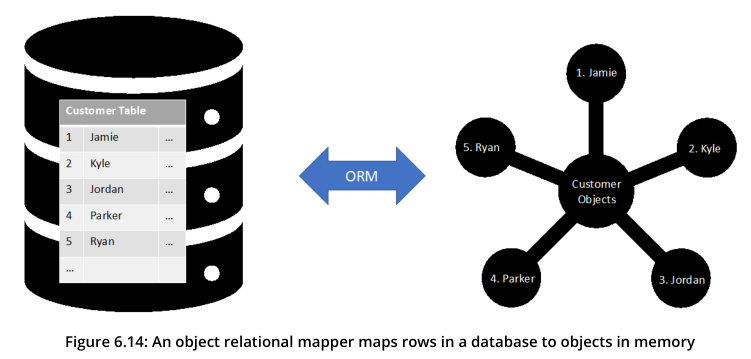

In [8]:
from IPython.display import Image
Image('images/mapper_maps.PNG')

Embora esses dois pacotes sejam poderosos, vale a pena notar que eles ainda usam o pacote **psycopg2** para se conectar ao banco de dados e executar consultas. A grande vantagem que esses pacotes oferecem é que eles abstraem algumas das complexidades da conexão com o banco de dados. Ao abstrair essas complexidades, podemos nos conectar ao banco de dados sem nos preocuparmos em esquecer de fechar uma conexão ou derrubar um cursor.
### O que é SQLAlchemy?
SQLAlchemy é um kit de ferramentas SQL. Embora ofereça ótimas funcionalidades, o principal benefício no qual nos concentraremos aqui é o objeto SQLAlchemy **Engine**.

Um objeto SQLAlchemy Engine contém informações sobre o tipo de banco de dados (no nosso caso, PostgreSQL) e um pool de conexões. O pool de conexões permite várias conexões com o banco de dados que operam simultaneamente. O pool de conexões também é benéfico porque não cria uma conexão até que uma consulta seja enviada para ser executada. Como essas conexões não são formadas até que a consulta esteja sendo executada, diz-se que o objeto **Engine** exibe inicialização lenta. O termo "lazy" é usado para indicar que nada acontece (a conexão não é formada) até que uma solicitação seja feita. Isso é vantajoso porque minimiza o tempo de conexão e reduz a carga no banco de dados.

Outra vantagem do SQLAlchemy **Engine** é que ele confirma automaticamente (autocommits) alterações no banco de dados devido a **CREATE TABLE**, **UPDATE**, **INSERT** ou outras instruções que modificam nosso banco de dados.

No nosso caso, vamos querer usá-lo porque ele fornece um mecanismo robusto para acessar bancos de dados. Se a conexão for interrompida, um SQLAlchemy Engine poderá instanciar essa conexão porque possui um pool de conexões. Ele também fornece uma interface agradável que funciona bem com outros pacotes (como pandas).

### Usando Python com Notebooks Jupyter
Além de usar o *Python* interativamente na linha de comando, podemos usar o *Python* em um formato de notebook em nosso navegador da web. Isso é útil para exibir visualizações e executar análises exploratórias.

In [9]:
from sqlalchemy import create_engine
import pandas as pd


Você notará que estamos importando dois pacotes aqui – o primeiro é o módulo **create_engine** dentro do pacote **sqlalchemy**, e o segundo é **pandas**, que renomeamos para **pd** porque esta é a convenção padrão (e tem menos caracteres). Usando esses dois pacotes, poderemos ler e gravar dados de e para nosso banco de dados e visualizar a saída.

Em seguida, configuraremos nosso notebook para exibir gráficos e visualizações inline. Podemos fazer isso com o seguinte comando:
`% matplotlib inline`
Isso diz ao pacote **matplotlib** (que é uma dependência de pandas) para criar gráficos e visualizações inline em nosso notebook. Pressione *Shift + Enter* novamente para pular para a próxima célula.

Nesta célula, vamos definir nossa string de conexão:

`cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"`
`               "@{host}:{port}/{database}")`
`print(cnxn_string)`

Pressione *Shift + Enter* novamente e agora você verá nossa string de conexão impressa. Em seguida, precisamos preencher nossos parâmetros e criar o banco de dados **Engine**. Você pode substituir as strings que começam com **your_** pelos parâmetros específicos da sua conexão:

In [11]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
	username="postgres",
    pswd="admin",
    host="127.0.0.1",
    port=5432,
    database="sqlda"))

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


Neste comando, executamos **create_engine** para criar nosso objeto **Engine** do banco de dados. Passamos nossa string de conexão e a formatamos para nossa conexão de banco de dados específica, preenchendo os espaços reservados para **{username}**, **{pswd}**, **{host}**, **{port}** e **{database}**.
Como o SQLAlchemy é preguiçoso, não saberemos se nossa conexão com o banco de dados foi bem-sucedida até tentarmos enviar um comando. Podemos testar se esse mecanismo de banco de dados funciona executando o seguinte comando e pressionando *Shift + Enter*:

In [17]:
engine.execute('SELECT * FROM customers LIMIT 2').fetchall()

[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

A saída deste comando é uma lista *Python* contendo linhas do nosso banco de dados em tuplas. Embora tenhamos lido com sucesso os dados do nosso banco de dados, provavelmente acharemos mais prático ler os nossos dados num Pandas DataFrame na próxima seção.

### Lendo e gravando em nosso banco de dados com Pandas
*Python* vem com ótimas estruturas de dados, incluindo listas, dicionários e tuplas. Embora sejam úteis, os nossos dados geralmente podem ser representados em forma de tabela, com linhas e colunas, semelhante à forma como armazenamos dados no nosso banco de dados. Para esses fins, o objeto DataFrame, no Pandas, pode ser particularmente útil.

Além de fornecer estruturas de dados poderosas, o Pandas também oferece:
* Funcionalidade para ler dados diretamente de um banco de dados
* Visualização de dados
* Ferramentas de análise de dados

Se continuarmos de onde paramos com nosso notebook Jupyter, podemos usar o objeto SQLAlchemy **Engine** para ler dados em um DataFrame do Pandas:

In [20]:
customers_data = pd.read_sql_table('customers', engine)
customers_data.head()

,customer_id,title,first_name,last_name,suffix,email,gender,ip_address,phone,street_address,city,state,postal_code,latitude,longitude,date_added
0,1,None,Arlena,Riveles,None,ariveles0@stumbleupon.com,F,98.36.172.246,None,None,None,None,None,NaN,NaN,2017-04-23
1,2,Dr,Ode,Stovin,None,ostovin1@npr.org,M,16.97.59.186,314-534-4361,2573 Fordem Parkway,Saint Louis,MO,63116,38.5814,-90.2625,2014-10-02
2,3,None,Braden,Jordan,None,bjordan2@geocities.com,M,192.86.248.59,None,5651 Kennedy Park,Pensacola,FL,32590,30.6143,-87.2758,2018-10-27
3,4,None,Jessika,Nussen,None,jnussen3@salon.com,F,159.165.138.166,615-824-2506,224 Village Circle,Nashville,TN,37215,36.0986,-86.8219,2017-09-03
4,5,None,Lonnie,Rembaud,None,lrembaud4@discovery.com,F,18.131.58.65,786-499-3431,38 Lindbergh Way,Miami,FL,33124,25.5584,-80.4582,2014-03-06


Agora armazenamos toda a nossa tabela de **customers** como um DataFrame do Pandas na variável **customer_data**. A função **read_sql_table** do Pandas requer dois parâmetros: o nome de uma tabela e o banco de dados conectável (neste caso, o SQLAlchemy Engine).

Como alternativa, podemos usar a função **read_sql_query**, que recebe uma string de consulta em vez de um nome de tabela.

### Executando a visualização de dados com Pandas
Agora que sabemos como ler os dados do banco de dados, podemos começar a fazer algumas análises e visualizações básicas.
### Exercício 21: Lendo dados e visualizando dados em Python
Neste exercício, estaremos lendo dados da saída do banco de dados e visualizando os resultados usando Python, notebooks Jupyter, SQLAlchemy e Pandas. Estaremos analisando as informações demográficas dos clientes por cidade para entender melhor nosso público-alvo.
1. Abra o notebook Jupyter da seção anterior e clique na última célula vazia.
2. Insira a seguinte consulta entre aspas triplas (aspas triplas permitem strings que abrangem várias linhas em Python):

In [22]:
query = """
		SELECT city,
				COUNT(1) AS number_of_customers,
				COUNT(NULLIF(gender, 'M')) AS female,
				COUNT(NULLIF(gender, 'F')) AS male
		FROM customers
		WHERE city IS NOT NULL
		GROUP BY 1
		ORDER BY 2 DESC
		LIMIT 10
        """

Para cada cidade, esta consulta calcula a contagem de clientes e calcula a contagem para cada sexo. Ele também remove os clientes com informações de cidade ausentes e agrega os dados de nossos clientes pela primeira coluna (a cidade). Além disso, ele classifica os dados pela segunda coluna (a contagem de clientes) do maior para o menor (decrescente). Em seguida, limita a produção ao top 10 (as 10 cidades com maior número de clientes).

3. Leia o resultado da consulta em um Pandas DataFrame com o seguinte comando e execute as células usando *Shift + Enter*:

In [23]:
top_cities_data = pd.read_sql_query(query, engine)

4. Você pode visualizar os dados em **top_cities_data** inserindo-os em uma nova célula e simplesmente pressionando *Shift + Enter*. Assim como no interpretador *Python*, inserir uma variável ou expressão exibirá o valor. Você notará que o Pandas também numera as linhas por padrão – no Pandas, isso é chamado de índice.

In [24]:
top_cities_data

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


5. Agora, vamos traçar o número de homens e mulheres em cada uma das 10 principais cidades. Como queremos visualizar as estatísticas de cada cidade separadamente, podemos usar um gráfico de barras simples para visualizar os dados:

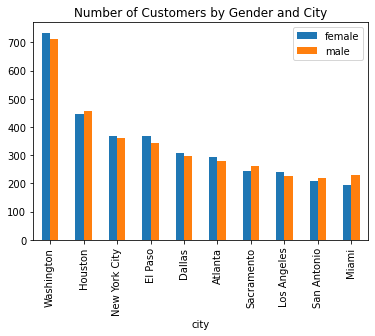

In [26]:
ax = top_cities_data.plot.bar('city', y=['female', 'male'], title='Number of Customers by Gender and City')

Os resultados mostram que não há diferença significativa no gênero do cliente para as cidades para as quais estamos pensando em expandir.
### Gravando dados no banco de dados usando Python
Haverá também muitos cenários em que vamos querer usar *Python* para gravar dados de volta no banco de dados e, felizmente para nós, Pandas e SQLAlchemy tornam isso relativamente fácil.

Se tivermos nossos dados em um Pandas DataFrame, podemos gravar dados de volta no banco de dados usando a função Pandas **to_sql(…)**, que requer dois parâmetros: o nome da tabela para gravar e a conexão. O melhor de tudo é que a função **to_sql(…)** também cria a tabela de destino para nós inferindo tipos de coluna usando os tipos de dados de um DataFrame.

Podemos testar essa funcionalidade usando o DataFrame **top_cities_data** que criamos anteriormente. Vamos usar o seguinte comando **to_sql(…)** em nosso notebook Jupyter existente:

In [27]:
top_cities_data.to_sql('top_cities_data', engine,
                       index=False, if_exists='replace')

Além dos dois parâmetros obrigatórios, adicionamos dois parâmetros opcionais a esta função – o parâmetro **index** especifica se queremos que o índice seja uma coluna em nossa tabela de banco de dados (um valor de **False** significa que não o incluiremos), e o parâmetro **if_exists** permite especificar como lidar com um cenário em que já existe uma tabela com dados no banco de dados. Nesse caso, queremos descartar essa tabela e substituí-la pelos novos dados, então usamos a opção **'replace'**. Em geral, você deve ter cuidado ao usar a opção **'replace'**, pois pode perder inadvertidamente seus dados existentes.

Agora, podemos consultar esses dados de qualquer cliente de banco de dados, incluindo **psql**. Aqui está o resultado quando tentamos consultar esta nova tabela em nosso banco de dados:

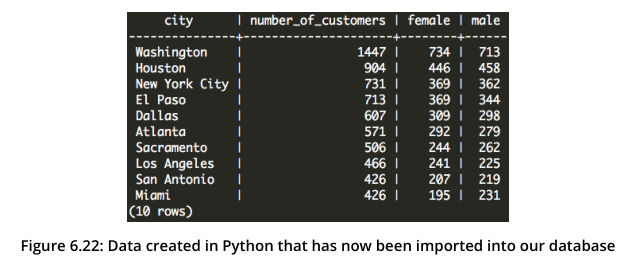

In [28]:
Image('images/data_created.PNG')

### Melhorando a velocidade de gravação do Python com COPY
Embora essa funcionalidade seja simples e funcione conforme o esperado, ela usa instruções de **insert** para enviar dados ao banco de dados. Para uma pequena tabela de 10 linhas, tudo bem, mas para tabelas maiores, o comando **psql \copy** será muito mais rápido.
Na verdade, podemos usar o comando **COPY** em conjunto com *Python*, *SQLAlchemy* e *Pandas* para fornecer a mesma velocidade que obtemos com **\copy**. Digamos que definimos a seguinte função:

In [29]:
import csv
from io import StringIO
def psql_insert_copy(table, conn, keys, data_iter):
	# gets a DBAPI connection that can provide a cursor
	dbapi_conn = conn.connection
	with dbapi_conn.cursor() as cur:
		s_buf = StringIO()
		writer = csv.writer(s_buf)
		writer.writerows(data_iter)
		s_buf.seek(0)
		columns = ', '.join('"{}"'.format(k) for k in keys)
		if table.schema:
			table_name = '{}.{}'.format(table.schema, table.name)
		else:
			table_name = table.name
			sql = 'COPY {} ({}) FROM STDIN WITH CSV'.format(
				table_name, columns)
		cur.copy_expert(sql=sql, file=s_buf)

Podemos então aproveitar o parâmetro method em **to_sql**, conforme mostrado aqui:

In [30]:
top_cities_data.to_sql('top_cities_data', engine,
                       index=False, if_exists='replace',
                       method=psql_insert_copy)

A função **psql_insert_copy** definida aqui pode ser usada sem modificação em nenhuma de suas importações PostgreSQL do Pandas. Aqui está um detalhamento do que esse código faz:
1. Após realizar algumas importações necessárias, começamos definindo a função usando a palavra-chave **def** seguida pelo nome da função (**psql_insert_copy**) e os parâmetros (**table, conn, keys e data_iter**).
2. Em seguida, estabelecemos uma conexão (**dbapi_conn**) e um cursor (**cur**) que podemos usar para execução.
3. Em seguida, gravamos todos os dados em nossas linhas (representados em **data_iter**) em um buffer de string (**s_buf**) formatado como um arquivo CSV, mas que existe na memória e não em um arquivo em nosso disco rígido.
4. Em seguida, definimos os nomes das colunas (**columns**) e o nome da tabela (**table_name**).
5. Por fim, executamos a instrução **COPY** transmitindo o conteúdo do arquivo CSV por meio da entrada padrão (**STDIN**).

### Lendo e gravando arquivos CSV com Python
Além de ler e gravar dados em nosso banco de dados, podemos usar *Python* para ler e gravar dados de nosso sistema de arquivos local. Os comandos para ler e gravar arquivos CSV com Pandas são muito semelhantes aos usados para ler e gravar em nosso banco de dados:

Para escrever, **pandas.DataFrame.to_csv(file_path, index=False)** escreveria o DataFrame em seu sistema de arquivos local usando o **file_path** fornecido.

Para leitura, **pandas.read_csv(file_path, dtype={})** retornaria uma representação DataFrame dos dados fornecidos no arquivo CSV localizado em **file_path**.

Ao ler um arquivo CSV, o Pandas inferirá o tipo de dados correto com base nos valores no arquivo. Por exemplo, se a coluna contiver apenas números inteiros, ela criará a coluna com um tipo de dados **int64**.

Da mesma forma, pode inferir se uma coluna contém floats, timestamps ou strings. O **Pandas** também pode inferir se há ou não um cabeçalho para o arquivo e, geralmente, essa funcionalidade funciona muito bem. Se houver uma coluna que não é lida corretamente (por exemplo, um CEP de cinco dígitos dos EUA pode ser lido como um número inteiro, fazendo com que os zeros à esquerda caiam – "07123" se tornaria 7123 sem zeros à esquerda), você pode especificar o tipo de coluna diretamente usando o parâmetro **dtype**. Por exemplo, se você tiver uma coluna **zip_code** em seu conjunto de dados, poderá especificar que é uma string usando **dtype={'zip_code': str}**.

> ##### Observação
> Há muitas maneiras diferentes de formatar um arquivo CSV. Embora o pandas geralmente pode inferir o cabeçalho e os tipos de dados corretos, há muitos parâmetros oferecidos para personalizar a leitura e a gravação de um arquivo CSV para as suas necessidades.

Usando **top_cities_data** em nosso notebook, podemos testar esta funcionalidade:

In [31]:
top_cities_data.to_csv('top_cities_analysis.csv', index=False)
my_data = pd.read_csv('top_cities_analysis.csv')
my_data

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


**my_data** agora contém os dados que escrevemos em um CSV e depois os lemos de volta. Não precisamos especificar o parâmetro opcional **dtype** neste caso porque nossas colunas podem ser inferidas corretamente usando **pandas**. Você deverá ver uma cópia idêntica dos dados que estão em **top_cities_data**.

## Práticas recomendadas para importar e exportar dados
Neste ponto, vimos vários métodos diferentes para ler e gravar dados entre nosso computador e nosso banco de dados. Cada método tem seu próprio caso de uso e propósito. Geralmente, haverá dois fatores-chave que devem orientar seu processo de tomada de decisão:
* Você deve tentar acessar o banco de dados com a mesma ferramenta que usará para analisar os dados. À medida que você adiciona mais etapas para obter seus dados do banco de dados para sua ferramenta de análise, você aumenta as maneiras pelas quais novos erros podem surgir. Quando você não pode acessar o banco de dados usando a mesma ferramenta que usará para processar os dados, você deve usar o **psql** para ler e gravar arquivos CSV em seu banco de dados.
* Ao gravar dados, você pode economizar tempo usando os comandos **COPY** ou **\copy**.

### Indo sem senha
Além de tudo o que foi mencionado até agora, também é uma boa ideia configurar um arquivo **.pgpass**. Um arquivo **.pgpass** especifica os parâmetros que você usa para se conectar ao seu banco de dados, incluindo sua senha. Todos os métodos programáticos de acesso ao banco de dados discutidos neste módulo (usando psql, R e Python) permitirão que você ignore o parâmetro de senha se seu arquivo **.pgpass** contiver a senha para o *hostname, database e username* correspondentes.

Em sistemas baseados em Unix e macOS X, você pode criar o arquivo **.pgpass** em seu diretório inicial. No Windows, você pode criar o arquivo em **%APPDATA%\postgresql\pgpass.conf**. O arquivo deve conter uma linha para cada conexão de banco de dados que você deseja armazenar e deve seguir este formato (personalizado para seus parâmetros de banco de dados):

`hostname:port:database:username:password`

Para usuários de Unix e Mac, você precisará alterar as permissões no arquivo usando o seguinte comando na linha de comando (no Terminal):

`chmod 0600 ~/.pgpass`

Para usuários do Windows, supõe-se que você tenha protegido as permissões do arquivo para que outros usuários não possam acessá-lo. Depois de criar o arquivo, você pode testar se ele funciona chamando **psql** da seguinte forma no terminal:

`psql -h my_host -p 5432 -d my_database -U my_username`

Se o arquivo **.pgpass** foi criado com sucesso, sua senha não será solicitada.

### Atividade 8: Usando um conjunto de dados externo para descobrir tendências de vendas
Nesta atividade, usaremos os dados do Censo dos Estados Unidos sobre o uso do transporte público por código postal para ver se o nível de uso do transporte público tem alguma correlação com as vendas do ZoomZoom em um determinado local.
1. Faça o download do transporte público de acordo com o conjunto de dados de código postal do GitHub:
https://github.com/TrainingByPackt/SQL-for-Data-Analytics/blob/master/Datasets/public_transportation_statistics_by_zip_code.csv

Este conjunto de dados contém três colunas:
* **zip_code**: Este é o código postal de cinco dígitos dos Estados Unidos usado para identificar a região.

* **public_transportation_pct**: Esta é a porcentagem da população em um código postal que foi identificada como usando transporte público para ir ao trabalho.

* **public_transportation_population**: Este é o número bruto de pessoas em um CEP que usam transporte público para ir ao trabalho.
2. Copie os dados do conjunto de dados de transporte público para o banco de dados do cliente ZoomZoom criando uma tabela para eles no conjunto de dados ZoomZoom.
3. Encontre as porcentagens máxima e mínima nesses dados. Valores abaixo de 0 provavelmente indicarão dados ausentes.
4. Calcule os valores médios de vendas para clientes que moram em regiões de alto transporte público (mais de 10%) e baixo uso de transporte público (menor ou igual a 10%).
5. Leia os dados em pandas e plote um histograma da distribuição (dica: você pode usar **my_data.plot.hist(y='public_transportation_pct')** para plotar um histograma se você ler os dados em um DataFrame pandas my_data).
6. Usando pandas, teste usando a função **to_sql** com e sem o parâmetro **method=psql_insert_copy**. Como as velocidades se comparam? (Dica: em um notebook Jupyter, você pode adicionar **%time** na frente do seu comando para ver quanto tempo leva.)
7. Agrupe os clientes com base em seu código postal de uso de transporte público, arredondado para os 10% mais próximos, e observe o número médio de transações por cliente. Exporte esses dados para o Excel e crie um gráfico de dispersão para entender melhor a relação entre o uso do transporte público e as vendas.
8. Com base nessa análise, quais recomendações você daria para a equipe executiva da ZoomZoom ao considerar oportunidades de expansão?